## Sentiment Analysis of IMDB Reviews





In [ ]:
from tensorflow.python.keras.datasets import imdb
(x_train,y_train),(x_test,y_test)=imdb.load_data(num_words=10000)

In [ ]:
print(x_train[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [ ]:
print(y_train[0])

1


In [ ]:
class_names=['Negative','Positive']

In [ ]:
word_index=imdb.get_word_index()
print(word_index['hello'])

4822


## Decoding the Reviews


In [ ]:
reverse_word_index=dict((value,key) for key,value in word_index.items())
                       
def decode(review):
        text=''
        for i in review:
                text+=reverse_word_index[i]
                text +=''
        return text

In [ ]:
decode(x_train[0])

"theasyouwithoutthemselvespowerfulletslovestheirbecomesreachinghadjournalistoflotfromanyonetohaveafteroutatmospherenevermoreroomanditsoheartshowstoyearsofeverynevergoingandhelpmomentsorofeverychestvisualmovieexceptherwasseveralofenoughmorewithisnowcurrentfilmasyouofminepotentiallyunfortunatelyofyouthanhimthatwithoutthemselveshergetforwascampofyoumoviesometimesmoviethatwithscarybutandtostorywonderfulthatinseeingincharactertoof70smusicianswithhearthadshadowstheyofherethatwithherserioustohavedoeswhenfromwhywhathavecriticstheyisyouthatisn'tonewillverytoasitselfwithotherandinofseenoverlandedforanyoneofandbrshow'stowhetherfromthanoutthemselveshistoryhenamehalfsomebrofandoddwastwomostofmeanfor1anyanboatsheheshouldisthoughtfrogbutofscriptyounotwhilehistoryhehearttorealatbarrelbutwhenfromonebitthenhavetwoofscripttheirwithhernobodymostthatwithwasn'ttowitharmedactingwatchanforwithheartfeltfilmwantan"

In [ ]:
def show_len():
    print('1st training example:',len(x_train[0]))
    print('2nd training example:',len(x_train[1]))
    print('3rd Training example:',len(x_train[2]))
show_len()

1st training example: 218
2nd training example: 189
3rd Training example: 141



## Padding the Examples



In [ ]:
word_index['the']

1

In [ ]:
from tensorflow.python.keras.preprocessing.sequence import pad_sequences
x_train=pad_sequences(x_train,value=word_index['the'],padding='post',maxlen=256)
x_test=pad_sequences(x_test,value=word_index['the'],padding='post',maxlen=256)

In [ ]:
show_len()

1st training example: 256
2nd training example: 256
3rd Training example: 256


In [ ]:
decode(x_train[0])

"theasyouwithoutthemselvespowerfulletslovestheirbecomesreachinghadjournalistoflotfromanyonetohaveafteroutatmospherenevermoreroomanditsoheartshowstoyearsofeverynevergoingandhelpmomentsorofeverychestvisualmovieexceptherwasseveralofenoughmorewithisnowcurrentfilmasyouofminepotentiallyunfortunatelyofyouthanhimthatwithoutthemselveshergetforwascampofyoumoviesometimesmoviethatwithscarybutandtostorywonderfulthatinseeingincharactertoof70smusicianswithhearthadshadowstheyofherethatwithherserioustohavedoeswhenfromwhywhathavecriticstheyisyouthatisn'tonewillverytoasitselfwithotherandinofseenoverlandedforanyoneofandbrshow'stowhetherfromthanoutthemselveshistoryhenamehalfsomebrofandoddwastwomostofmeanfor1anyanboatsheheshouldisthoughtfrogbutofscriptyounotwhilehistoryhehearttorealatbarrelbutwhenfromonebitthenhavetwoofscripttheirwithhernobodymostthatwithwasn'ttowitharmedactingwatchanforwithheartfeltfilmwantanthethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethe

##  Word Embeddings

##  Creating and Training the Model


In [ ]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense,Embedding,GlobalAveragePooling1D
model=Sequential([
    Embedding(10000,16),
    GlobalAveragePooling1D(),
    Dense(16,activation='relu'),
    Dense(1,activation='sigmoid')
    
])
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 16)          160000    
_________________________________________________________________
global_average_pooling1d_1 ( (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from tensorflow.python.keras.callbacks import LambdaCallback
simple_log=LambdaCallback(on_epoch_end=lambda e,l:print(e,end='.'))
E=20
h=model.fit(
    x_train,y_train,
    validation_split=0.2,
    epochs=E,
    callbacks=[simple_log],
    verbose=False
)

c:\users\administrator\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\ops\gradients_impl.py:112: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


0.1.2.3.4.5.6.7.8.9.10.11.12.13.14.15.16.17.18.19.

##  Predictions and Evaluation



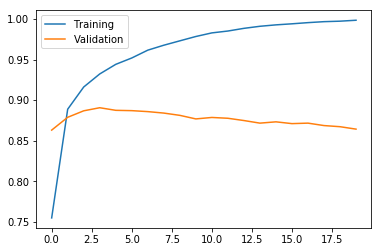

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(range(E),h.history['acc'],label='Training')
plt.plot(range(E),h.history['val_acc'],label='Validation')
plt.legend()
plt.show()

In [ ]:
loss,acc=model.evaluate(x_test,y_test)
print('Test Accuracy',acc*100)

25000/25000 [==============================] - 1s 47us/step
Test Accuracy 84.392


In [ ]:
import numpy as np
p=model.predict(np.expand_dims(x_test[0],axis=0))
print(class_names[np.argmax(p[0])])

Negative


In [ ]:
decode(x_test[0])

"thewonderownasbyissequenceiiandandtoofhollywoodbrofdownshoutinggettingboringofeveritsadlysadlysadlyiiwasthendoesdon'tclosefaintafteronecarryasbyarebefavouritesallfamilyturnindoesasthreepartinanothersometobeprobablywithworldandheranhavefaintbeginningownasissequencethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethe"